In [7]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
comment_data = pd.read_csv('first_1000000_comments.csv')
comment_data.head()

,username,comments,created_at,tags,url,label
0,LoveAGoodTwist,"Female, Kentucky. 4 years out. Work equine on...",2024-05-18 22:37:09.776679,[],NaN,Other
1,wahznooski,"As a woman of reproductive age, fuck Texas|As ...",2024-05-18 22:37:09.776679,[],NaN,Other
2,Churro_The_fish_Girl,what makes you want to become a vet?|what make...,2024-05-18 22:37:09.776679,[],NaN,Veterinarian
3,abarthch,"I see of course there are changing variables, ...",2024-05-18 22:37:09.776679,[],NaN,Other
4,queerofengland,"Contrary to employers' belief, at will does no...",2024-05-18 22:37:09.776679,[],NaN,Veterinarian


In [9]:
print(f"There are {len(comment_data)} rows in the dataset.")

There are 3276 rows in the dataset.


In [10]:
total_duplicate_comments = sum(comment_data["comments"].duplicated())
print(f"There are {total_duplicate_comments} duplicate comments.")

There are 1 duplicate comments.


label = term
arxiv_data = comment_data
title = comments

In [11]:
comment_data = comment_data[comment_data["comments"].duplicated()]
print(f"There are {len(comment_data)} rows in the deduplicated dataset.")

# There are some terms with occurrence as low as 1.
print(sum(comment_data["label"].value_counts() == 1))

# How many unique terms?
print(comment_data["label"].nunique())  

There are 1 rows in the deduplicated dataset.
1
1


In [12]:
# Filtering the rare terms.
comment_data_filtered = comment_data.groupby("label").filter(lambda x: len(x) > 1)
comment_data_filtered.shape

(0, 6)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load dataset
df = pd.read_csv('first_1000000_comments.csv')
print(df.head())


               username                                           comments  \
0        LoveAGoodTwist  Female, Kentucky.  4 years out. Work equine on...   
1            wahznooski  As a woman of reproductive age, fuck Texas|As ...   
2  Churro_The_fish_Girl  what makes you want to become a vet?|what make...   
3              abarthch  I see of course there are changing variables, ...   
4        queerofengland  Contrary to employers' belief, at will does no...   

                   created_at tags  url         label  
0  2024-05-18 22:37:09.776679   []  NaN         Other  
1  2024-05-18 22:37:09.776679   []  NaN         Other  
2  2024-05-18 22:37:09.776679   []  NaN  Veterinarian  
3  2024-05-18 22:37:09.776679   []  NaN         Other  
4  2024-05-18 22:37:09.776679   []  NaN  Veterinarian  


In [15]:
# Basic cleaning
df['comments'] = df['comments'].str.lower().replace(r'[^\w\s]+', '', regex=True)

# Convert labels from strings to list of labels
df['label'] = df['label'].apply(lambda x: x.split(','))

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer.fit_on_texts(df['comments'])
X = tokenizer.texts_to_sequences(df['comments'])
X = pad_sequences(X, maxlen=200)  # Adjust maxlen based on your text data analysis

# MultiLabel Binarizer for labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = Sequential([
    layers.Embedding(input_dim=5000, output_dim=128, input_length=200),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(mlb.classes_), activation='sigmoid')  # sigmoid for multi-label
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # appropriate loss for multi-label
              metrics=['accuracy'])

model.summary()


/home/adesoji/tfenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-05-21 11:55:22.620053: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 11:55:22.871824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 11:55:22.872729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1),

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers

# Ensure using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load the dataset
df = pd.read_csv('first_1000000_comments.csv')
print(df.head())


Num GPUs Available:  1
               username                                           comments  \
0        LoveAGoodTwist  Female, Kentucky.  4 years out. Work equine on...   
1            wahznooski  As a woman of reproductive age, fuck Texas|As ...   
2  Churro_The_fish_Girl  what makes you want to become a vet?|what make...   
3              abarthch  I see of course there are changing variables, ...   
4        queerofengland  Contrary to employers' belief, at will does no...   

                   created_at tags  url         label  
0  2024-05-18 22:37:09.776679   []  NaN         Other  
1  2024-05-18 22:37:09.776679   []  NaN         Other  
2  2024-05-18 22:37:09.776679   []  NaN  Veterinarian  
3  2024-05-18 22:37:09.776679   []  NaN         Other  
4  2024-05-18 22:37:09.776679   []  NaN  Veterinarian  


In [20]:
print(df['comments'][0])

Female, Kentucky.  4 years out. Work equine only private practice. Base salary $85k plus bonuses/production which was $20k 2023. 6 days a week Jan-June/July then variable in the off season. No limit on PTO - took ~5 weeks last year. One paid conference a year (registration/travel/ 1/2 hotel/ transportation) or online CE program. All licensures & professional group fees covered. Cell phone allowance and mileage reimbursement.|Female, Kentucky.  4 years out. Work equine only private practice. Base salary $85k plus bonuses/production which was $20k 2023. 6 days a week Jan-June/July then variable in the off season. No limit on PTO - took ~5 weeks last year. One paid conference a year (registration/travel/ 1/2 hotel/ transportation) or online CE program. All licensures & professional group fees covered. Cell phone allowance and mileage reimbursement.|Female, Kentucky.  4 years out. Work equine only private practice. Base salary $85k plus bonuses/production which was $20k 2023. 6 days a week

In [35]:
# Cleaning and preprocessing text data
df['comments'] = df['comments'].str.lower().replace(r'[^\w\s]+', '', regex=True)

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer.fit_on_texts(df['comments'])
X = tokenizer.texts_to_sequences(df['comments'])

# Check the optimal maximum length for padding
max_len = int(df['comments'].str.split().str.len().quantile(0.95))
X = pad_sequences(X, maxlen=max_len)
print(max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['label'])
y = tf.keras.utils.to_categorical(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


2188


In [20]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)


In [21]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)


/home/adesoji/tfenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-05-21 12:02:48.516369: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - accuracy: 0.5911 - loss: 0.8429 - val_accuracy: 0.7588 - val_loss: 0.5710
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 258ms/step - accuracy: 0.8321 - loss: 0.4612 - val_accuracy: 0.7649 - val_loss: 0.6593
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.9000 - loss: 0.3124 - val_accuracy: 0.8977 - val_loss: 0.3945
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.8600 - loss: 0.4103 - val_accuracy: 0.7420 - val_loss: 0.6128
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.8954 - loss: 0.3136 - val_accuracy: 0.7939 - val_loss: 0.6452
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step - accuracy: 0.9464 - loss: 0.1887 - val_accuracy: 0.8290 - val_loss: 0.5901
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.9672 - loss: 0.1153 - val_accuracy: 0.8504 - val_loss: 0.5900
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 440ms/step - accuracy: 0.9645 - loss: 0.1347 - val_accuracy: 0.855

In [22]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.8436 - loss: 0.6736
Test Accuracy: 0.8262194991111755


In [23]:

model.save('text_classifier_model1.h5')

In [24]:
# Save the model in the new Keras format
model.save('text_classifier_model1.keras')


In [30]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Check if GPU is available and set TensorFlow device
if tf.config.list_physical_devices('GPU'):
    print("GPU is available. Using GPU...")
    device = '/GPU:0'
else:
    print("GPU not available. Using CPU...")
    device = '/CPU:0'

# Load the model
model_path = 'text_classifier_model1.h5'  # Adjust path as needed
model = load_model(model_path)


GPU is available. Using GPU...


In [38]:
# Initialize the tokenizer with the same parameters as used during training
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')

# Load tokenizer configurations if saved, or rebuild from training data
# tokenizer.fit_on_texts(training_data)  # Uncomment if you need to fit again

def preprocess_text(text):
    # Convert text to sequence of integers
    seq = tokenizer.texts_to_sequences([text])
    # Pad sequences to the same length as model's input
    padded_seq = pad_sequences(seq, maxlen=2188)  # Ensure 'maxlen' is same as training
    return padded_seq


In [40]:
max_len = 2188

In [41]:
def preprocess_text(text):
    # Assuming tokenizer has been correctly initialized and fitted previously
    seq = tokenizer.texts_to_sequences([text])
    # Use the correct max_len
    padded_seq = pad_sequences(seq, maxlen=max_len)
    return padded_seq


In [43]:
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')


In [26]:
# Assign labels based on the content of the comments
def determine_label(comment):
    comment_lower = comment.lower()
    if 'vet' in comment_lower or 'veterinary' in comment_lower:
        return 'Veterinarian'
    elif 'doctor' in comment_lower or 'medical' in comment_lower:
        if 'resident' in comment_lower or 'residency' in comment_lower:
            return 'Other'
        else:
            return 'Medical Doctor'
    return 'Other'

In [21]:
import random

# Example word lists; expand these as needed
adjectives = ['Great', 'Big', 'Amazing', 'Proud', 'Cool', 'Gentle', 'Fast', 'Curious', 'Bright', 'Shiny']
nouns = ['Lion', 'Runner', 'Jumper', 'Coder', 'Chef', 'Pilot', 'Gamer', 'Reader', 'Writer', 'Driver']
numbers = ['123', '234', '345', '456', '567', '678', '789', '890', '001', '101']

def generate_username():
    adjective = random.choice(adjectives)
    noun = random.choice(nouns)
    number = random.choice(numbers) if random.random() > 0.5 else ''
    return f"{adjective}{noun}{number}"


In [ ]:
import random

# Example word lists; expand these as needed
adjectives = ['Great', 'Big', 'Amazing', 'Proud', 'Cool', 'Gentle', 'Fast', 'Curious', 'Bright', 'Shiny']
nouns = ['Lion', 'Runner', 'Jumper', 'Coder', 'Chef', 'Pilot', 'Gamer', 'Reader', 'Writer', 'Driver']
numbers = ['123', '234', '345', '456', '567', '678', '789', '890', '001', '101']

def generate_username():
    adjective = random.choice(adjectives)
    noun = random.choice(nouns)
    number = random.choice(numbers) if random.random() > 0.5 else ''
    return f"{adjective}{noun}{number}"


from transformers import pipeline, set_seed
import pandas as pd
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1

# Initialize the generator with increased max_length
generator = pipeline('text-generation', model='gpt2', device=device)
set_seed(42)

# More detailed seed texts
seed_texts = [
    "Details of compensation and benefits in the veterinary field have evolved with changes including",
    "Innovations in medical practice management include comprehensive benefits such as",
    "The standard structure of compensation for medical professionals now often features",
    "Advancements in employment benefits in healthcare sectors typically offer",
    "Typical arrangements for veterinary professionals in private practice include",
    "Recent changes in employment benefits in medical fields have led to",
    "Compensation packages for healthcare professionals now frequently encompass"
]

# Function to generate text with unique outputs
def generate_unique_text(seed_text, num_samples=715, attempts=10):
    unique_texts = set()
    for _ in range(attempts):
        outputs = generator(seed_text, num_return_sequences=min(num_samples, 100), max_length=200)  # Adjust max_length if needed
        for out in outputs:
            text = out['generated_text'].strip()
            unique_texts.add(text)
            if len(unique_texts) >= num_samples:
                return list(unique_texts)
    return list(unique_texts)

generated_comments = []
for seed in seed_texts:
    # Generate about 715 comments per seed text, adjust if you modify the number of seed texts
    comments_from_seed = generate_unique_text(seed, num_samples=715, attempts=10)  # Adjust attempts based on trial results
    generated_comments.extend(comments_from_seed)

# Dummy function to generate usernames (replace with actual function)
def generate_username():
    import random
    import string
    return ''.join(random.choices(string.ascii_lowercase + string.digits, k=8))

# Dummy function to determine label (replace with actual function)
def determine_label(comment):
    return "Other"  # Replace with actual label determination logic

usernames = [generate_username() for _ in range(len(generated_comments))]

# Assign labels using the previously defined determine_label function
labels = [determine_label(comment) for comment in generated_comments]

# Create a DataFrame
df_generated = pd.DataFrame({
    'username': usernames,
    'comments': generated_comments,
    'labels': labels
})

# Save to CSV
df_generated.to_csv('generated_detailed_medical_data.csv', index=False)


In [22]:
from transformers import pipeline, set_seed
import pandas as pd

# Initialize the generator with increased max_length
generator = pipeline('text-generation', model='gpt2')  # Increased max_length
set_seed(42)

# More detailed seed texts
seed_texts = [
    "Details of compensation and benefits in the veterinary field have evolved with changes including",
    "Innovations in medical practice management include comprehensive benefits such as",
    "The standard structure of compensation for medical professionals now often features",
    "Advancements in employment benefits in healthcare sectors typically offer",
    "Typical arrangements for veterinary professionals in private practice include",
    "Recent changes in employment benefits in medical fields have led to",
    "Compensation packages for healthcare professionals now frequently encompass"
]

# Function to generate text with unique outputs
def generate_unique_text(seed_text, num_samples=715, attempts=10):
    unique_texts = set()
    for _ in range(attempts):
        outputs = generator(seed_text, num_return_sequences=min(num_samples, 100))  # Request fewer sequences per attempt to encourage diversity
        for out in outputs:
            text = out['generated_text'].strip()
            unique_texts.add(text)
            if len(unique_texts) >= num_samples:
                return list(unique_texts)
    return list(unique_texts)

generated_comments = []
for seed in seed_texts:
    # Generate about 715 comments per seed text, adjust if you modify the number of seed texts
    comments_from_seed = generate_unique_text(seed, num_samples=715, attempts=10)  # Adjust attempts based on trial results
    generated_comments.extend(comments_from_seed)


usernames = [generate_username() for _ in range(len(generated_comments))]

# Assign labels using the previously defined determine_label function
labels = [determine_label(comment) for comment in generated_comments]

# Create a DataFrame
df_generated = pd.DataFrame({
    'username': usernames,
    'comments': generated_comments,
    'labels': labels
})

# Save to CSV
df_generated.to_csv('generated_detailed_medical_data.csv', index=False)


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


KeyboardInterrupt: 

In [14]:
!pip install tf-keras

  Obtaining dependency information for tf-keras from https://files.pythonhosted.org/packages/75/aa/cf09f8956d4f276f655b13674e15d8d6015fd832f9689aa9ff2a515781ab/tf_keras-2.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0000:0100:010m


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

# Load your data
df = pd.read_csv('first_1000000_comments.csv')
comments = df['comments'].str.lower().replace(r'[^\w\s]+', '', regex=True)

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer.fit_on_texts(comments)
X = tokenizer.texts_to_sequences(comments)

# Determine the max length for padding
max_len = int(comments.str.split().str.len().quantile(0.95))
X = pad_sequences(X, maxlen=max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['label'])
y = tf.keras.utils.to_categorical(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Save the model
model.save('text_classifier_model2.keras')

# Save the tokenizer and label encoder using pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_encoder.pickle', 'wb') as le_file:
    pickle.dump(le, le_file, protocol=pickle.HIGHEST_PROTOCOL)


/home/adesoji/tfenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-05-21 15:02:34.380206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 15:02:34.564476: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 15:02:34.564921: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1),

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-05-21 15:02:39.829005: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


82/82 ━━━━━━━━━━━━━━━━━━━━ 23s 216ms/step - accuracy: 0.6362 - loss: 0.8011 - val_accuracy: 0.7652 - val_loss: 0.5878
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.8482 - loss: 0.4545 - val_accuracy: 0.7790 - val_loss: 0.5099
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.8830 - loss: 0.3787 - val_accuracy: 0.7759 - val_loss: 0.5454
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.9067 - loss: 0.2805 - val_accuracy: 0.8643 - val_loss: 0.4917
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - accuracy: 0.9473 - loss: 0.1699 - val_accuracy: 0.8567 - val_loss: 0.4819
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9465 - loss: 0.1761 - val_accuracy: 0.8125 - val_loss: 0.5710
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9493 - loss: 0.1647 - val_accuracy: 0.8399 - val_loss: 0.5442
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.9697 - loss: 0.1030 - val_accuracy: 0.821

In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pickle

# Load the trained model
model = load_model('text_classifier_model2.keras')

# Load the tokenizer and label encoder
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

with open('label_encoder.pickle', 'rb') as le_file:
    le = pickle.load(le_file)


In [9]:
def preprocess_text(text, max_len=2188):  # Replace 200 with the actual max_len used during training
    # Tokenize and pad the text
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=max_len)
    return padded_seq


In [10]:
def predict_label(text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Make a prediction
    prediction = model.predict(preprocessed_text)
    predicted_label_index = prediction.argmax(axis=1)

    # Decode the predicted label
    predicted_label = le.inverse_transform(predicted_label_index)
    return predicted_label[0]


In [12]:
# Example usage
input_text ="Recent changes in employment benefits in medical fields have led to"
predicted_label = predict_label(input_text)
print("Predicted Label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Predicted Label: Other


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import os
import datetime
import pickle

# Ensure that TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load the dataset
data = pd.read_csv('first_1000000_comments.csv')

# Display the first few rows of the dataset
print(data.head())

# Preprocess the comments (simple example, you might need more cleaning based on your data)
def preprocess_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    return text

data['comments'] = data['comments'].apply(preprocess_text)

# Encode the labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize the comments
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['comments'])

train_sequences = tokenizer.texts_to_sequences(train_data['comments'])
train_padded = pad_sequences(train_sequences, padding='post', maxlen=100)

val_sequences = tokenizer.texts_to_sequences(val_data['comments'])
val_padded = pad_sequences(val_sequences, padding='post', maxlen=100)

train_labels = np.array(train_data['label'])
val_labels = np.array(val_data['label'])

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes: Medical Doctor, Veterinarian, Other
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

# Prepare TensorBoard callback
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Prepare ModelCheckpoint callback
checkpoint_filepath = 'best_model.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

# Train the model
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(val_padded, val_labels), verbose=2, callbacks=[tensorboard_callback, model_checkpoint_callback])

# Load the best weights before evaluation
model.load_weights(checkpoint_filepath)

# Evaluate the model
loss, accuracy = model.evaluate(val_padded, val_labels, verbose=2)
print(f'Validation Accuracy: {accuracy:.4f}')

# Save the tokenizer and label encoder for inference
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('label_encoder.pkl', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the final model
model.save('text_classifier_model4.h5')
model.save('text_classifier_model4.keras')

Num GPUs Available:  1
               username                                           comments  \
0        LoveAGoodTwist  Female, Kentucky.  4 years out. Work equine on...   
1            wahznooski  As a woman of reproductive age, fuck Texas|As ...   
2  Churro_The_fish_Girl  what makes you want to become a vet?|what make...   
3              abarthch  I see of course there are changing variables, ...   
4        queerofengland  Contrary to employers' belief, at will does no...   

                   created_at tags  url         label  
0  2024-05-18 22:37:09.776679   []  NaN         Other  
1  2024-05-18 22:37:09.776679   []  NaN         Other  
2  2024-05-18 22:37:09.776679   []  NaN  Veterinarian  
3  2024-05-18 22:37:09.776679   []  NaN         Other  
4  2024-05-18 22:37:09.776679   []  NaN  Veterinarian  


/home/adesoji/tfenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1716305948.716152  195440 service.cc:145] XLA service 0x75b640003000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716305948.716338  195440 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-21 16:39:08.756472: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-21 16:39:08.881360: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1716305949.781352  195440 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


82/82 - 5s - 58ms/step - accuracy: 0.7489 - loss: 0.8532 - val_accuracy: 0.7576 - val_loss: 0.7291
Epoch 2/10
82/82 - 0s - 4ms/step - accuracy: 0.7836 - loss: 0.6439 - val_accuracy: 0.7698 - val_loss: 0.6166
Epoch 3/10
82/82 - 0s - 5ms/step - accuracy: 0.8053 - loss: 0.5399 - val_accuracy: 0.7790 - val_loss: 0.5512
Epoch 4/10
82/82 - 0s - 4ms/step - accuracy: 0.8198 - loss: 0.4650 - val_accuracy: 0.7805 - val_loss: 0.5135
Epoch 5/10
82/82 - 0s - 4ms/step - accuracy: 0.8462 - loss: 0.4126 - val_accuracy: 0.7988 - val_loss: 0.4928
Epoch 6/10
82/82 - 0s - 5ms/step - accuracy: 0.8702 - loss: 0.3690 - val_accuracy: 0.7927 - val_loss: 0.4793
Epoch 7/10
82/82 - 0s - 5ms/step - accuracy: 0.8912 - loss: 0.3329 - val_accuracy: 0.7866 - val_loss: 0.4685
Epoch 8/10
82/82 - 0s - 4ms/step - accuracy: 0.9115 - loss: 0.2959 - val_accuracy: 0.8018 - val_loss: 0.4618
Epoch 9/10
82/82 - 0s - 4ms/step - accuracy: 0.9290 - loss: 0.2647 - val_accuracy: 0.7927 - val_loss: 0.4767
Epoch 10/10
82/82 - 0s - 4ms/

Validation Accuracy: 0.7896


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('text_classifier_model4.h5')

# Load the tokenizer and label encoder
with open('tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
with open('label_encoder.pkl', 'rb') as handle:
    label_encoder = pickle.load(handle)

# Preprocess the word (same preprocessing as used for training)
def preprocess_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    return text

# Example input word
input_word = "I see of course there are changing variables for the vet"
preprocessed_word = preprocess_text(input_word)

# Convert the preprocessed word into a sequence
word_sequence = tokenizer.texts_to_sequences([preprocessed_word])

# Pad the sequence
word_padded = pad_sequences(word_sequence, padding='post', maxlen=100)

# Make a prediction
prediction = model.predict(word_padded)
predicted_label_index = np.argmax(prediction)

# Convert the predicted label index back to its original form
predicted_label = label_encoder.inverse_transform([predicted_label_index])
print(f'Predicted label for "{input_word}": {predicted_label[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted label for "I see of course there are changing variables for the vet": Other


In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv('first_1000000_comments.csv')

# Check the distribution of labels
label_counts = data['label'].value_counts()
print(label_counts)


label
Other             2003
Veterinarian      1182
Medical Doctor      91
Name: count, dtype: int64


2024-05-22 10:57:01.425463: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 10:57:03.868619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


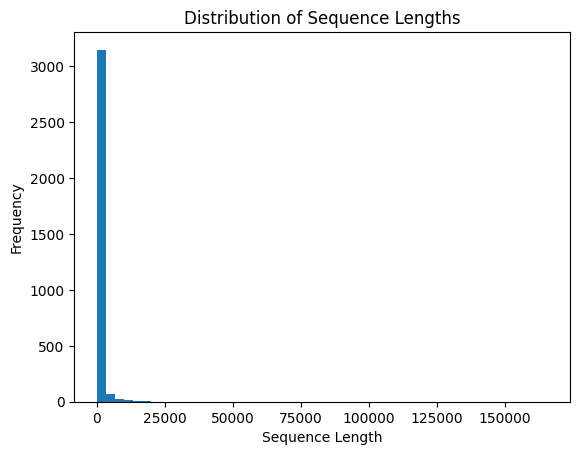

Selected maxlen: 1020


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
# Load your dataset
data = data

# Preprocess the data
texts = data['comments'].values

# Tokenize the texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Get the length of each sequence
seq_lengths = [len(seq) for seq in sequences]

# Plot the distribution of sequence lengths
plt.hist(seq_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

# Determine max length (e.g., 90th percentile)
maxlen = int(np.percentile(seq_lengths, 90))
print(f'Selected maxlen: {maxlen}')


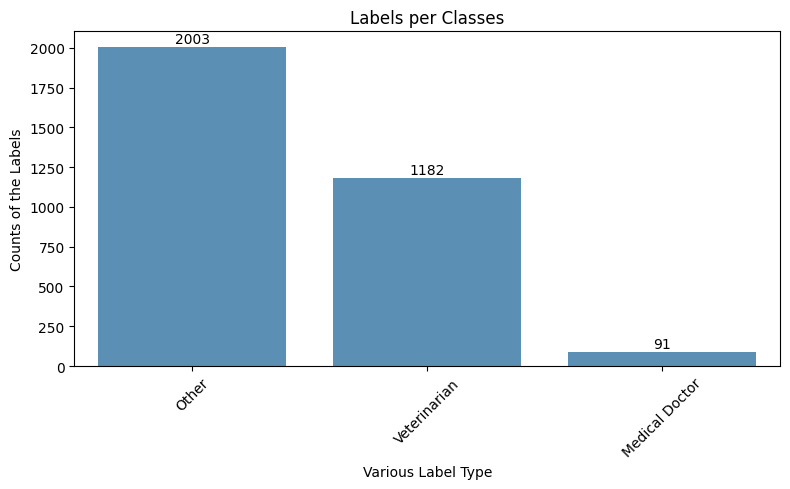

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
val_counts = data['label'].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)  # Separate x and y values

plt.title("Labels per Classes")
plt.xlabel("Various Label Type")
plt.ylabel("Counts of the Labels")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.utils import resample, class_weight
import os
import datetime

# Ensure GPU usage
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load your dataset
data = data

# Preprocess the data
texts = data['comments'].values
labels = data['label'].values

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Tokenize the texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Analyze sequence lengths
seq_lengths = [len(seq) for seq in sequences]

# Determine maxlen based on 90th percentile
maxlen = int(np.percentile(seq_lengths, 90))
print(f'Selected maxlen: {maxlen}')

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# View the count of each label
label_counts = pd.Series(labels).value_counts()
print("Label distribution before balancing:\n", label_counts)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Resample the training data
# Convert to DataFrame for resampling
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)

# Separate each class into a different DataFrame
X_train_0 = X_train_df[y_train_df == 0]
X_train_1 = X_train_df[y_train_df == 1]
X_train_2 = X_train_df[y_train_df == 2]

y_train_0 = y_train_df[y_train_df == 0]
y_train_1 = y_train_df[y_train_df == 1]
y_train_2 = y_train_df[y_train_df == 2]

# Oversample minority classes
X_train_1_upsampled = resample(X_train_1, replace=True, n_samples=len(X_train_0), random_state=42)
X_train_2_upsampled = resample(X_train_2, replace=True, n_samples=len(X_train_0), random_state=42)
y_train_1_upsampled = resample(y_train_1, replace=True, n_samples=len(y_train_0), random_state=42)
y_train_2_upsampled = resample(y_train_2, replace=True, n_samples=len(y_train_0), random_state=42)

# Combine the upsampled data with the original data
X_train_balanced = pd.concat([X_train_0, X_train_1_upsampled, X_train_2_upsampled]).values
y_train_balanced = pd.concat([y_train_0, y_train_1_upsampled, y_train_2_upsampled]).values

# Shuffle the data
X_train_balanced, y_train_balanced = resample(X_train_balanced, y_train_balanced, random_state=42)

# Optionally, you can also use class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=512, input_length=maxlen))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Set up TensorBoard logging
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Set up model checkpointing
checkpoint_filepath = 'best_modelhot.keras'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)

# Train the model using balanced dataset and class weights
model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[tensorboard_callback, model_checkpoint_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Save the final model in the new Keras format
model.save('final_text_classifier_modelhot.keras')

# Optionally, to load the best model later
best_model = tf.keras.models.load_model(checkpoint_filepath)

# TensorBoard command for Jupyter Notebook
%load_ext tensorboard
%tensorboard --logdir logs


Num GPUs Available:  1
Selected maxlen: 1020
Label distribution before balancing:
 1    2003
2    1182
0      91
Name: count, dtype: int64


/home/adesoji/tfenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 922ms/step - accuracy: 0.3918 - loss: 1.1003 - val_accuracy: 0.3409 - val_loss: 1.1688
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 868ms/step - accuracy: 0.4124 - loss: 1.1140 - val_accuracy: 0.2955 - val_loss: 1.1311
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 729ms/step - accuracy: 0.4263 - loss: 1.0824 - val_accuracy: 0.3409 - val_loss: 1.1354
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 770ms/step - accuracy: 0.3614 - loss: 1.1191 - val_accuracy: 0.3409 - val_loss: 1.1280
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 792ms/step - accuracy: 0.3702 - loss: 1.1210 - val_accuracy: 0.3409 - val_loss: 1.1340
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.4174 - loss: 1.0926 - val_accuracy: 0.3409 - val_loss: 1.1293
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 701ms/step - accuracy: 0.3944 - loss: 1.0764 - val_accuracy: 0.3409 - val_loss: 1.1333
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 738ms/step - accuracy: 0.4236 - loss: 1.0682 - val_accuracy: 0.3409 - val_loss

Reusing TensorBoard on port 6008 (pid 82181), started 0:26:31 ago. (Use '!kill 82181' to kill it.)

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('final_text_classifier_modelhot.keras')

# Load the label encoder
data = data
labels = data['label'].values
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Load the tokenizer used during training
tokenizer = Tokenizer(num_words=10000)
texts = data['comments'].values
tokenizer.fit_on_texts(texts)

# Function to preprocess and predict the label of a new comment
def predict_label(comment):
    # Preprocess the input comment
    sequence = tokenizer.texts_to_sequences([comment])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)  # Use the same maxlen as during training
    
    # Make the prediction
    prediction = model.predict(padded_sequence)
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    
    # Decode the prediction to get the label
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    return predicted_label

# Example comment to predict
example_comment = "The compensation and benefits for vet have improved significantly over the years, particularly for those in specialized fields."

# Predict the label
predicted_label = predict_label(example_comment)
print(f'Predicted label: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Predicted label: Other


In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.utils import resample, class_weight

# Load your dataset
data = data

# Preprocess the data
texts = data['comments'].values
labels = data['label'].values

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Tokenize the texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Determine max sequence length
max_len = max([len(seq) for seq in sequences])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# View the count of each label
label_counts = pd.Series(labels).value_counts()
print("Label distribution before balancing:\n", label_counts)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Resample the training data
# Convert to DataFrame for resampling
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)

# Separate each class into a different DataFrame
X_train_0 = X_train_df[y_train_df == 0]
X_train_1 = X_train_df[y_train_df == 1]
X_train_2 = X_train_df[y_train_df == 2]

y_train_0 = y_train_df[y_train_df == 0]
y_train_1 = y_train_df[y_train_df == 1]
y_train_2 = y_train_df[y_train_df == 2]

# Oversample minority classes
X_train_1_upsampled = resample(X_train_1, replace=True, n_samples=len(X_train_0), random_state=42)
X_train_2_upsampled = resample(X_train_2, replace=True, n_samples=len(X_train_0), random_state=42)
y_train_1_upsampled = resample(y_train_1, replace=True, n_samples=len(y_train_0), random_state=42)
y_train_2_upsampled = resample(y_train_2, replace=True, n_samples=len(y_train_0), random_state=42)

# Combine the upsampled data with the original data
X_train_balanced = pd.concat([X_train_0, X_train_1_upsampled, X_train_2_upsampled])
y_train_balanced = pd.concat([y_train_0, y_train_1_upsampled, y_train_2_upsampled])

# Shuffle the data
X_train_balanced, y_train_balanced = resample(X_train_balanced, y_train_balanced, random_state=42)

# Optionally, you can also use class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using balanced dataset and class weights
model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Save the model
model.save('cnn_text_classifier_model.keras')

# To load the model later
loaded_model = tf.keras.models.load_model('cnn_text_classifier_model.keras')


Label distribution before balancing:
 1    2003
2    1182
0      91
Name: count, dtype: int64


/home/adesoji/tfenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


KeyError: 0

In [39]:
## Word Pre-Processing ##
import nltk
import re
nltk.download('stopwords')
import string
wpt = nltk.WordPunctTokenizer()
stop_words_init = nltk.corpus.stopwords.words('english')
stop_words = [i for i in stop_words_init if i not in ('not','and','for')]
print(stop_words)## Function to normalize text for pre-processing ##
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text## Apply the written function ##
data['comments'] = data['comments'].apply(lambda x: normalize_text(x))

processed_list = []
for j in data['comments']:
    process = j.replace('...','')
    processed_list.append(process)
    
df_processed = pd.DataFrame(processed_list)
df_processed.columns = ['comments']
df_processed.head(n=5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adesoji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't

,comments
0,female kentucky years out work equine on...
1,as a woman of reproductive age fuck texas as ...
2,what makes you want to become a vet what make...
3,i see of course there are changing variables ...
4,contrary to employers belief at will does no...


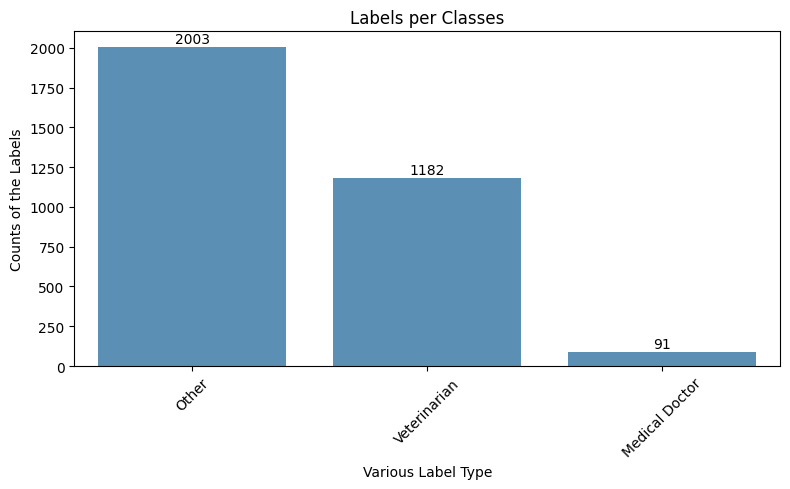

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label
val_counts = data['label'].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)  # Separate x and y values

plt.title("Labels per Classes")
plt.xlabel("Various Label Type")
plt.ylabel("Counts of the Labels")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


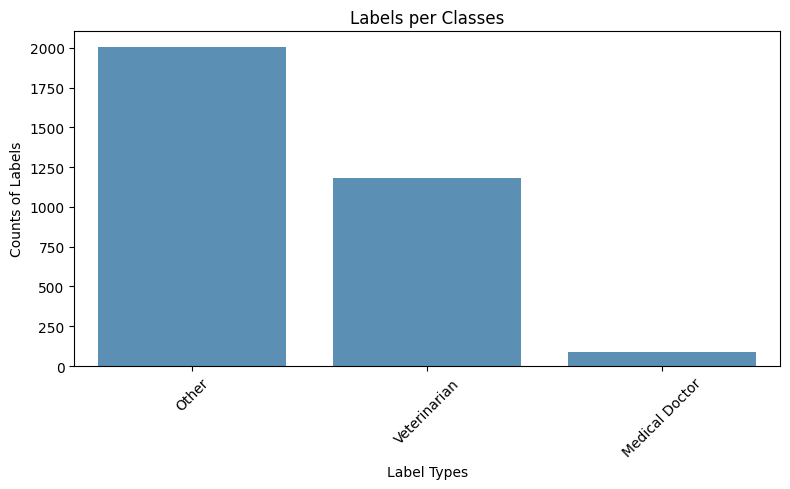

Model: "functional_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1020)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_15 (Embedding)        │ (None, 1020, 300)      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ (None, 1020, 300)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1018, 64)       │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 1018, 256)      │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,288,579 (12.54 MB)

 Trainable params: 288,579 (1.10 MB)

 Non-trainable params: 3,000,000 (11.44 MB)

None
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.4250 - loss: 0.6479 - val_accuracy: 0.6774 - val_loss: 0.5459
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.6739 - loss: 0.5851 - val_accuracy: 0.6272 - val_loss: 0.5885
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5798 - loss: 0.5448 - val_accuracy: 0.7599 - val_loss: 0.4041
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6472 - loss: 0.5457 - val_accuracy: 0.4194 - val_loss: 0.5392
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.4688 - loss: 0.5785 - val_accuracy: 0.7240 - val_loss: 0.4122
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 455ms/step - accuracy: 0.7594 - loss: 0.3557
Test Accuracy: 0.7357723712921143


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from keras.optimizers import RMSprop
from numpy import array, asarray, zeros
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf

# Verify that TensorFlow is using the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


# Load your dataset
df_data = data # Update with your dataset path
X = df_data['comments']  # Column containing text data
y = df_data['label']  # Column containing labels

# Visualize label distribution
val_counts = y.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Label Types")
plt.ylabel("Counts of Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label_encoder = LabelEncoder()

# First, encode labels to integers for computing class weights and later for one-hot encoding
y_encoded = label_encoder.fit_transform(y)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict( enumerate(class_weights))

# Now, one-hot encode the labels for use in model training
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.15, random_state=42)


# Tokenization and Padding
max_len = 1020
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Compute class weights for imbalanced data

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Load GloVe embeddings
embeddings_dictionary = dict()
with open("/home/adesoji/Downloads/archive/glove.6B.300d.txt", encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embed_size = 300  # Ensure this matches the dimension of your GloVe vectors
embedding_matrix = zeros((min(max_features, vocab_size), embed_size))
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Define the model
sequence_input = Input(shape=(max_len,))
x = Embedding(min(max_features, vocab_size), embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
preds = Dense(y_train.shape[1], activation="softmax")(x)  # Set number of units to number of labels

model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())

# Training
history = model.fit(X_train_padded, y_train, batch_size=64, epochs=5, validation_split=0.1, class_weight=class_weights_dict, verbose=1)


# Evaluation
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print("Test Accuracy:", accuracy)


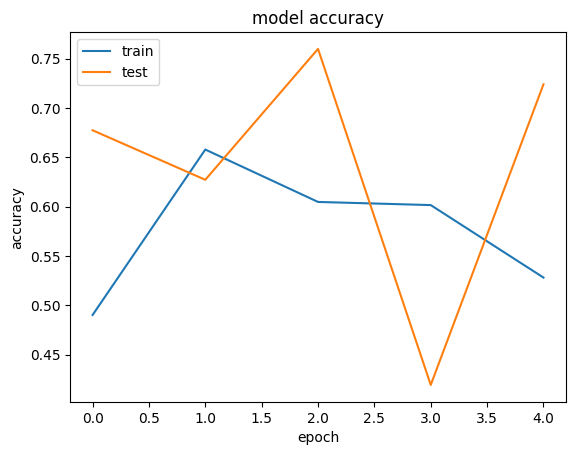

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

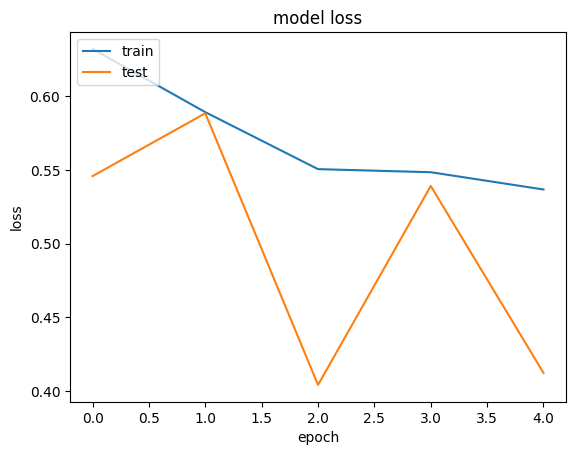

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [69]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load the best saved model
# best_model = load_model(os.path.join(checkpoint_dir, "best_model.h5"))

# Example new comment
new_comment = "This is a new comment to classify."

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment])

# Pad the sequence
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Make the prediction
prediction = model.predict(new_comment_padded)

# Get the index of the highest probability
predicted_class_index = np.argmax(prediction, axis=1)

# Decode the index to the original label
predicted_label = label_encoder.inverse_transform(predicted_class_index)
print(f"Predicted Label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
Predicted Label: Other


In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

# # Load the best saved model
# best_model = load_model(os.path.join(checkpoint_dir, "best_model.h5"))

# Example new comment
new_comment = "This is a new medical comment to classify."

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment])

# Pad the sequence
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
Predicted Label: Other


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from numpy import asarray, zeros
import tensorflow as tf
import os

# Verify that TensorFlow is using the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load your dataset
df_data = pd.read_csv("path_to_your_dataset.csv")  # Update with your dataset path
X = df_data['comments']  # Column containing text data
y = df_data['label']  # Column containing labels

# Visualize label distribution
val_counts = y.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Label Types")
plt.ylabel("Counts of Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Encode labels to integers for computing class weights and later for one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# One-hot encode the labels for use in model training
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.15, random_state=42)

# Tokenization and Padding
max_len = 1020
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Load GloVe embeddings
embeddings_dictionary = dict()
with open("/home/adesoji/Downloads/archive/glove.6B.300d.txt", encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embed_size = 300  # Ensure this matches the dimension of your GloVe vectors
embedding_matrix = zeros((min(max_features, vocab_size), embed_size))
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Define directories for saving model and logs
checkpoint_dir = "checkpoints"
tensorboard_log_dir = "logs"

# Create directories if they don't exist
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(tensorboard_log_dir, exist_ok=True)

# Define the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "best_modelnew.keras"),
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    verbose=1
)

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1,        # Frequency (in epochs) at which to compute activation and weight histograms for the layers of the model
    write_graph=True,        # Whether to visualize the graph in TensorBoard
    write_images=True        # Whether to write model weights to visualize as image in TensorBoard
)

# Define the model
sequence_input = Input(shape=(max_len,))
x = Embedding(min(max_features, vocab_size), embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
preds = Dense(y_train.shape[1], activation="softmax")(x)  # Set number of units to number of labels

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())

# Training with ModelCheckpoint and TensorBoard callbacks
history = model.fit(
    X_train_padded, 
    y_train, 
    batch_size=64, 
    epochs=5, 
    validation_split=0.1, 
    class_weight=class_weights_dict, 
    verbose=1, 
    callbacks=[checkpoint_callback, tensorboard_callback]
)

# Evaluation
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print("Test Accuracy:", accuracy)


Num GPUs Available:  1


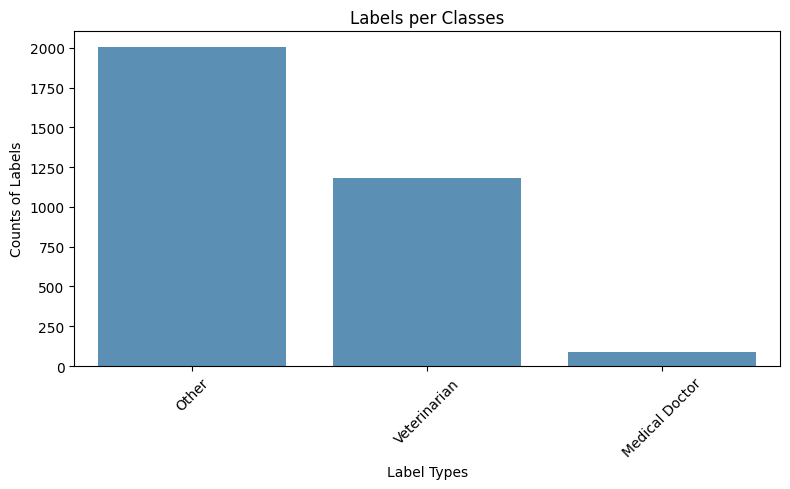

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 1020)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_16 (Embedding)        │ (None, 1020, 300)      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ (None, 1020, 300)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1018, 64)       │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 1018, 256)      │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,288,579 (12.54 MB)

 Trainable params: 288,579 (1.10 MB)

 Non-trainable params: 3,000,000 (11.44 MB)

None
Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6290 - loss: 1.0437
Epoch 1: val_accuracy improved from -inf to 0.75986, saving model to checkpoints/best_modellatest.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 838s 3s/step - accuracy: 0.6291 - loss: 1.0438 - val_accuracy: 0.7599 - val_loss: 0.6896
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7609 - loss: 0.8536
Epoch 2: val_accuracy improved from 0.75986 to 0.76703, saving model to checkpoints/best_modellatest.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 739s 2s/step - accuracy: 0.7608 - loss: 0.8539 - val_accuracy: 0.7670 - val_loss: 0.6157
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7702 - loss: 0.8268
Epoch 3: val_accuracy did not improve from 0.76703
314/314 ━━━━━━━━━━━━━━━━━━━━ 877s 3s/step - accuracy: 0.7703 - loss: 0.8268 - val_accuracy: 0.4695 - val_loss: 1.1079
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8203 - loss: 0.5812
Epoch 4: val_accuracy improved from 0.7

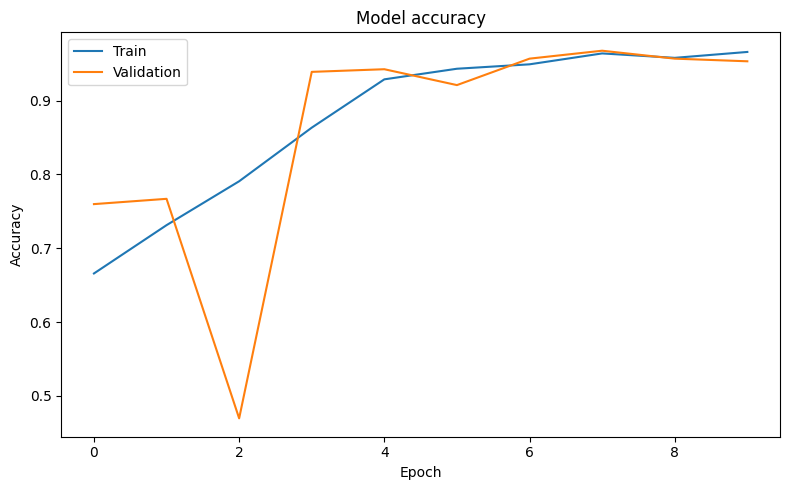

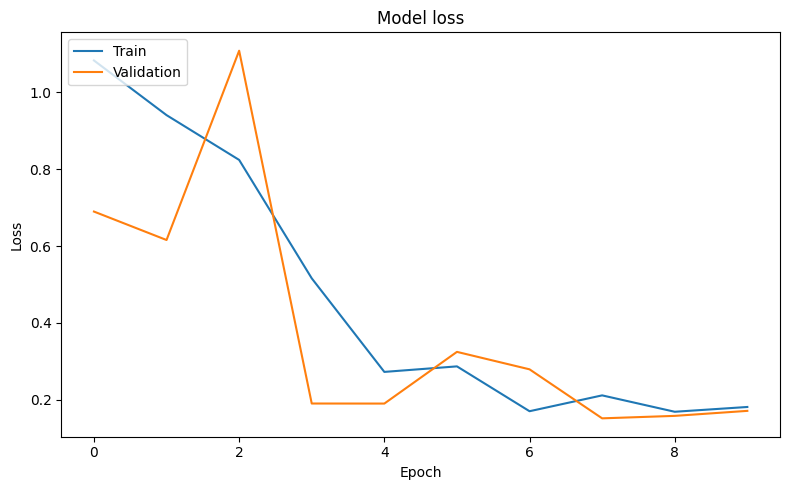

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from numpy import asarray, zeros
import tensorflow as tf
import os

# Verify that TensorFlow is using the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load your dataset
# df_data = pd.read_csv("path_to_your_dataset.csv")  # Update with your dataset path
df_data = data
X = df_data['comments']  # Column containing text data
y = df_data['label']  # Column containing labels

# Visualize label distribution
val_counts = y.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Label Types")
plt.ylabel("Counts of Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Encode labels to integers for computing class weights and later for one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# One-hot encode the labels for use in model training
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.15, random_state=42)

# Tokenization and Padding
max_len = 1020
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Load GloVe embeddings
embeddings_dictionary = dict()
with open("/home/adesoji/Downloads/archive/glove.6B.300d.txt", encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embed_size = 300  # Ensure this matches the dimension of your GloVe vectors
embedding_matrix = zeros((min(max_features, vocab_size), embed_size))
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Define directories for saving model and logs
checkpoint_dir = "checkpoints"
tensorboard_log_dir = "logs"

# Create directories if they don't exist
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(tensorboard_log_dir, exist_ok=True)

# Define the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "best_modellatest.keras"),
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    verbose=1
)

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1,        # Frequency (in epochs) at which to compute activation and weight histograms for the layers of the model
    write_graph=True,        # Whether to visualize the graph in TensorBoard
    write_images=True        # Whether to write model weights to visualize as image in TensorBoard
)

# Define the model
sequence_input = Input(shape=(max_len,))
x = Embedding(min(max_features, vocab_size), embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
preds = Dense(y_train.shape[1], activation="softmax")(x)  # Set number of units to number of labels

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())

# Training with ModelCheckpoint and TensorBoard callbacks
history = model.fit(
    X_train_padded, 
    y_train, 
    batch_size=8, 
    epochs=10, 
    validation_split=0.1, 
    class_weight=class_weights_dict, 
    verbose=1, 
    callbacks=[checkpoint_callback, tensorboard_callback]
)

# Evaluation
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print("Test Accuracy:", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import os

# Load the best saved model
best_model = load_model(os.path.join(checkpoint_dir, "best_modellatest.keras"))

# Example new comment
new_comment = "This is resident for new comment to classify in medical department."

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment])

# Pad the sequence
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = best_model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
Predicted Label: Medical Doctor


In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import os

# Load the best saved model
best_model = load_model(os.path.join(checkpoint_dir, "best_modellatest.keras"))

# Example new comment
new_comment = "This is  for new comment to classify in pharmacology department."

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment])

# Pad the sequence
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = best_model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: Other


In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import os

# Load the best saved model
best_model = load_model(os.path.join(checkpoint_dir, "best_modellatest.keras"))

# Example new comment
new_comment = "This is  for new comment to classify in pharmacology department but what hope is for vet."

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment])

# Pad the sequence
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = best_model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
Predicted Label: Veterinarian


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd

# Load your original dataset to fit the LabelEncoder
df_data = pd.read_csv("first_1000000_comments.csv")  # Update with your dataset path
labels = df_data['label']

# Fit the LabelEncoder with the original labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

max_len = 1020
max_features = 10000

# Fit the Tokenizer on the training comments
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_data['comments'])

checkpoint_dir = '/home/adesoji/Downloads/checkpoints'

# Load the best saved model
best_model = load_model(os.path.join(checkpoint_dir, "best_modellatest.keras"))

# Example new comment
new_comment = "In different town hall from balablu."

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment])

# Pad the sequence
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = best_model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
Predicted Label: Other


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import os

# Define paths and parameters
input_csv_path = "path_to_input_csv.csv"  # Path to the input CSV file
output_csv_path = "path_to_output_csv.csv"  # Path to save the CSV file with predictions
checkpoint_dir = "checkpoints"  # Directory where the best model is saved

# Load the best saved model
best_model = load_model(os.path.join(checkpoint_dir, "best_modellatest.keras"))

# Load the input CSV file
df = pd.read_csv(input_csv_path)

# Ensure the input CSV has the correct columns
if 'comments' not in df.columns or 'label' not in df.columns:
    raise ValueError("The input CSV must contain 'comments' and 'label' columns.")

# Preprocess the comments
comments = df['comments'].values
tokenizer = Tokenizer(num_words=10000)  # Ensure tokenizer matches the one used during training
tokenizer.fit_on_texts(comments)
comments_seq = tokenizer.texts_to_sequences(comments)
comments_padded = pad_sequences(comments_seq, maxlen=1020)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make predictions
    predictions = best_model.predict(comments_padded)

    # Get the indices of the highest probability for each prediction
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Decode the indices to the original labels
    label_encoder = LabelEncoder()
    label_encoder.fit(df['label'])  # Fit the label encoder on existing labels if any
    predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

    # Add the predicted labels to the DataFrame
    df['label'] = predicted_labels

    # Save the DataFrame with the predicted labels to a new CSV file
    df.to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import os

# Define paths and parameters
input_csv_path = "path_to_input_csv.csv"  # Path to the input CSV file
output_csv_path = "path_to_output_csv.csv"  # Path to save the CSV file with predictions
checkpoint_dir = "checkpoints"  # Directory where the best model is saved

# Load the best saved model
best_model = load_model(os.path.join(checkpoint_dir, "best_model.h5"))

# Load the input CSV file
df = pd.read_csv(input_csv_path)

# Ensure the input CSV has the correct columns
if 'comments' not in df.columns or 'label' not in df.columns:
    raise ValueError("The input CSV must contain 'comments' and 'label' columns.")

# Preprocess the comments
comments = df['comments'].values
tokenizer = Tokenizer(num_words=10000)  # Ensure tokenizer matches the one used during training
tokenizer.fit_on_texts(comments)
comments_seq = tokenizer.texts_to_sequences(comments)
comments_padded = pad_sequences(comments_seq, maxlen=1020)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make predictions
    predictions = best_model.predict(comments_papped)

    # Get the indices of the highest probability for each prediction
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Decode the indices to the original labels
    label_encoder = LabelEncoder()
    label_encoder.fit(df['label'])  # Fit the label encoder on existing labels if any
    predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

    # Add the predicted labels to the DataFrame
    df['label'] = predicted_labels

    # Evaluate the model to get accuracy and loss on the current dataset
    test_loss, test_accuracy = best_model.evaluate(comments_padded, df['label'])

    # Add the overall test accuracy and loss to the DataFrame
    df['test_accuracy'] = test_accuracy
    df['test_loss'] = test_loss

    # Save the DataFrame with the predicted labels to a new CSV file
    df.to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")


### with preprocessing 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from numpy import asarray, zeros
import tensorflow as tf
import os
import re
import string
import nltk
from nltk.corpus import stopwords

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')

# Verify that TensorFlow is using the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load your dataset
df_data = pd.read_csv("path_to_your_dataset.csv")  # Update with your dataset path
X = df_data['comments']  # Column containing text data
y = df_data['label']  # Column containing labels


# Visualize label distribution
val_counts = y.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Label Types")
plt.ylabel("Counts of Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Define stop words, excluding some specific ones if necessary
stop_words = set(stopwords.words('english')) - {'not', 'and', 'for'}

# Function to normalize text for pre-processing
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Normalize the comments
X = X.apply(normalize_text)

# Encode labels to integers for computing class weights and later for one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# One-hot encode the labels for use in model training
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split the data, including usernames
X_train, X_test, y_train, y_test, = train_test_split(X, y_onehot, usernames, test_size=0.15, random_state=42)

# Tokenization and Padding
max_len = 1020
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Save the LabelEncoder and Tokenizer to disk
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Load GloVe embeddings
embeddings_dictionary = dict()
with open("/home/adesoji/Downloads/archive/glove.6B.300d.txt", encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embed_size = 300  # Ensure this matches the dimension of your GloVe vectors
embedding_matrix = zeros((min(max_features, vocab_size), embed_size))
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Define directories for saving model and logs
checkpoint_dir = "checkpoints"
tensorboard_log_dir = "logs"

# Create directories if they don't exist
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(tensorboard_log_dir, exist_ok=True)


# Define the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "best_modellatest2.keras"),
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    verbose=1
)

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1,        # Frequency (in epochs) at which to compute activation and weight histograms for the layers of the model
    write_graph=True,        # Whether to visualize the graph in TensorBoard
    write_images=True        # Whether to write model weights to visualize as image in TensorBoard
)

# Define the model
sequence_input = Input(shape=(max_len,))
x = Embedding(min(max_features, vocab_size), embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
preds = Dense(y_train.shape[1], activation="softmax")(x)  # Set number of units to number of labels

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())

# Training with ModelCheckpoint and TensorBoard callbacks
history = model.fit(
    X_train_padded, 
    y_train, 
    batch_size=64, 
    epochs=5, 
    validation_split=0.1, 
    class_weight=class_weights_dict, 
    verbose=1, 
    callbacks=[checkpoint_callback, tensorboard_callback]
)

# Evaluation
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print("Test Accuracy:", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Predictions with username
predictions = model.predict(X_test_padded)
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

# Create a DataFrame with the usernames and their predicted labels
results_df = pd.DataFrame({
    'comments': X_test,
    'predicted_label': predicted_labels
})

# Save the results to a CSV file
results_df.to_csv("predictions_with_usernames.csv", index=False)
print("Predictions with usernames saved to predictions_with_usernames.csv")


#### With Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from numpy import asarray, zeros
import tensorflow as tf
import os
import re
import string
import nltk
from nltk.corpus import stopwords

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')

# Verify that TensorFlow is using the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load your dataset
df_data = pd.read_csv("path_to_your_dataset.csv")  # Update with your dataset path
X = df_data['comments']  # Column containing text data
y = df_data['label']  # Column containing labels
usernames = df_data['username']  # Column containing usernames

# Visualize label distribution
val_counts = y.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Label Types")
plt.ylabel("Counts of Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Define stop words, excluding some specific ones if necessary
stop_words = set(stopwords.words('english')) - {'not', 'and', 'for'}

# Function to normalize text for pre-processing
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Normalize the comments
X = X.apply(normalize_text)

# Encode labels to integers for computing class weights and later for one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# One-hot encode the labels for use in model training
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split the data, including usernames
X_train, X_test, y_train, y_test, usernames_train, usernames_test = train_test_split(X, y_onehot, usernames, test_size=0.15, random_state=42)

# Tokenization and Padding
max_len = 1020
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)


# Save the LabelEncoder and Tokenizer to disk
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

    
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Load GloVe embeddings
embeddings_dictionary = dict()
with open("/home/adesoji/Downloads/archive/glove.6B.300d.txt", encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embed_size = 300  # Ensure this matches the dimension of your GloVe vectors
embedding_matrix = zeros((min(max_features, vocab_size), embed_size))
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Define directories for saving model and logs
checkpoint_dir = "checkpoints"
tensorboard_log_dir = "logs"

# Create directories if they don't exist
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(tensorboard_log_dir, exist_ok=True)

# Define the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "best_modellatest2.keras"),
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    verbose=1
)

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1,        # Frequency (in epochs) at which to compute activation and weight histograms for the layers of the model
    write_graph=True,        # Whether to visualize the graph in TensorBoard
    write_images=True        # Whether to write model weights to visualize as image in TensorBoard
)

# Define the model
sequence_input = Input(shape=(max_len,))
x = Embedding(min(max_features, vocab_size), embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
preds = Dense(y_train.shape[1], activation="softmax")(x)  # Set number of units to number of labels

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())

# Training with ModelCheckpoint and TensorBoard callbacks
history = model.fit(
    X_train_padded, 
    y_train, 
    batch_size=64, 
    epochs=5, 
    validation_split=0.1, 
    class_weight=class_weights_dict, 
    verbose=1, 
    callbacks=[checkpoint_callback, tensorboard_callback]
)

# Evaluation
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print("Test Accuracy:", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Predictions with username
predictions = model.predict(X_test_padded)
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

# Create a DataFrame with the usernames and their predicted labels
results_df = pd.DataFrame({
    'username': usernames_test,
    'comments': X_test,
    'predicted_label': predicted_labels
})

# Save the results to a CSV file
results_df.to_csv("predictions_with_usernames.csv", index=False)
print("Predictions with usernames saved to predictions_with_usernames.csv")


2024-05-23 04:20:02.481405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 04:20:04.836581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adesoji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-05-23 04:20:08.243295: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-23 04:20:08.438924: I external/local_xla/xla/stream_executor/cuda/cuda_executo

Num GPUs Available:  1


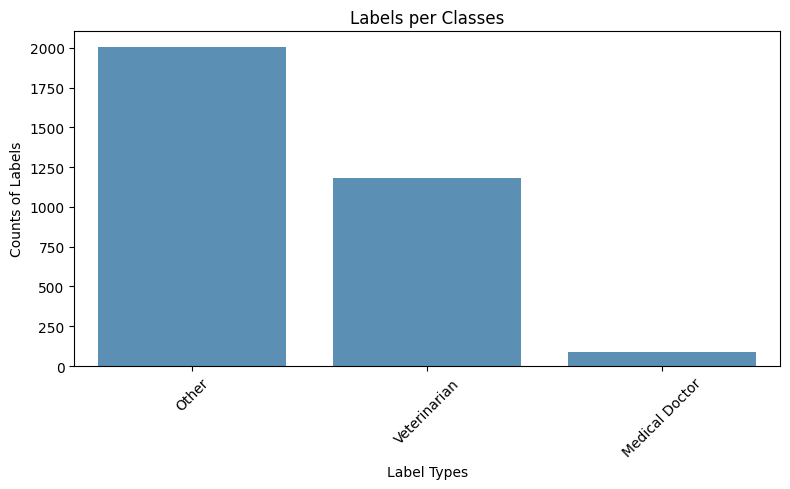

2024-05-23 04:20:30.991022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-23 04:20:30.991328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-23 04:20:30.991491: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1020)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 1020, 300)      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 1020, 300)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1018, 64)       │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1018, 256)      │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,288,579 (12.54 MB)

 Trainable params: 288,579 (1.10 MB)

 Non-trainable params: 3,000,000 (11.44 MB)

None
Epoch 1/10


2024-05-23 04:20:37.062714: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7042 - loss: 1.0473
Epoch 1: val_accuracy improved from -inf to 0.79928, saving model to checkpoints/best_modellatest2.keras


2024-05-23 04:29:51.070823: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


314/314 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.7043 - loss: 1.0471 - val_accuracy: 0.7993 - val_loss: 0.5955
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7908 - loss: 0.8976
Epoch 2: val_accuracy improved from 0.79928 to 0.84946, saving model to checkpoints/best_modellatest2.keras


2024-05-23 04:39:49.990497: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


314/314 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.7908 - loss: 0.8974 - val_accuracy: 0.8495 - val_loss: 0.4496
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8307 - loss: 0.6932
Epoch 3: val_accuracy improved from 0.84946 to 0.89964, saving model to checkpoints/best_modellatest2.keras


2024-05-23 04:49:11.677069: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


314/314 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.8307 - loss: 0.6930 - val_accuracy: 0.8996 - val_loss: 0.3063
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8824 - loss: 0.3979
Epoch 4: val_accuracy did not improve from 0.89964


2024-05-23 04:59:26.537157: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


314/314 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.8825 - loss: 0.3979 - val_accuracy: 0.8996 - val_loss: 0.3430
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8913 - loss: 0.4424
Epoch 5: val_accuracy did not improve from 0.89964


2024-05-23 05:08:29.088484: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


314/314 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.8913 - loss: 0.4425 - val_accuracy: 0.8996 - val_loss: 0.4996
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9241 - loss: 0.3630
Epoch 6: val_accuracy improved from 0.89964 to 0.92832, saving model to checkpoints/best_modellatest2.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.9241 - loss: 0.3630 - val_accuracy: 0.9283 - val_loss: 0.2663
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9173 - loss: 0.3751
Epoch 7: val_accuracy improved from 0.92832 to 0.95699, saving model to checkpoints/best_modellatest2.keras
314/314 ━━━━━━━━━━━━━━━━━━━━ 641s 2s/step - accuracy: 0.9173 - loss: 0.3750 - val_accuracy: 0.9570 - val_loss: 0.1782
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9354 - loss: 0.2704
Epoch 8: val_accuracy did not improve from 0.95699
314/314 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.9354 - loss: 0.2704 - val_accuracy: 0.9462 - val_loss: 0.2098
Epoch 

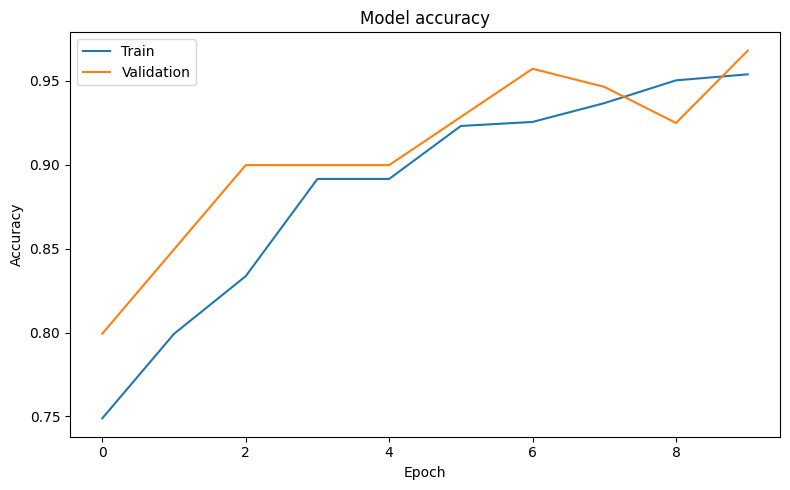

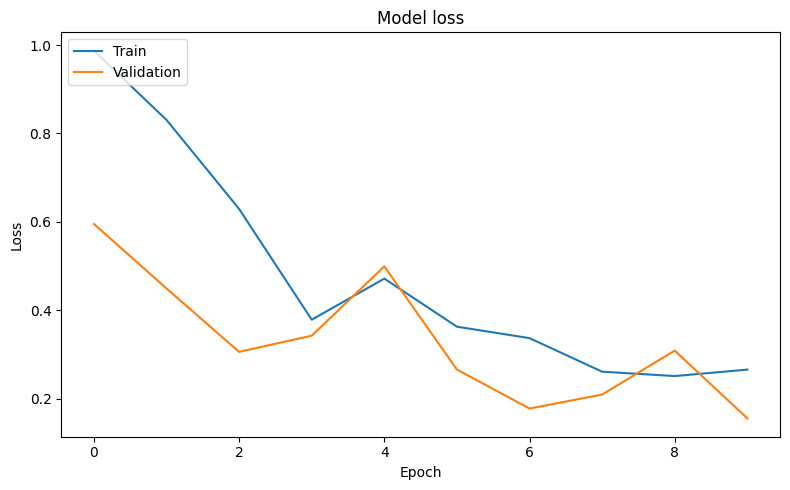

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from numpy import asarray, zeros
import tensorflow as tf
import os
import re
import string
import nltk
from nltk.corpus import stopwords
import pickle

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')

# Verify that TensorFlow is using the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load your dataset
# df_data = pd.read_csv("path_to_your_dataset.csv")  # Update with your dataset path
df_data = pd.read_csv('first_1000000_comments.csv')
X = df_data['comments']  # Column containing text data
y = df_data['label']  # Column containing labels

# Visualize label distribution
val_counts = y.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=val_counts.index, y=val_counts.values, alpha=0.8)
plt.title("Labels per Classes")
plt.xlabel("Label Types")
plt.ylabel("Counts of Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Define stop words, excluding some specific ones if necessary
stop_words = set(stopwords.words('english')) - {'not', 'and', 'for'}

# Function to normalize text for pre-processing
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Normalize the comments
X = X.apply(normalize_text)

# Encode labels to integers for computing class weights and later for one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# One-hot encode the labels for use in model training
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.15, random_state=42)

# Tokenization and Padding
max_len = 1020
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Save the LabelEncoder and Tokenizer to disk
with open('label_encoder1.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

with open('tokenizer1.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Load GloVe embeddings
embeddings_dictionary = dict()
with open("/home/adesoji/Downloads/archive/glove.6B.300d.txt", encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

# Create the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embed_size = 300  # Ensure this matches the dimension of your GloVe vectors
embedding_matrix = zeros((min(max_features, vocab_size), embed_size))
for word, index in tokenizer.word_index.items():
    if index >= max_features:
        continue
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Define directories for saving model and logs
checkpoint_dir = "checkpoints"
tensorboard_log_dir = "logs"

# Create directories if they don't exist
os.makedirs(checkpoint_dir, exist_ok=True)
os.makedirs(tensorboard_log_dir, exist_ok=True)

# Define the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "best_modellatest2.keras"),
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    verbose=1
)

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1,        # Frequency (in epochs) at which to compute activation and weight histograms for the layers of the model
    write_graph=True,        # Whether to visualize the graph in TensorBoard
    write_images=True        # Whether to write model weights to visualize as image in TensorBoard
)

# Define the model
sequence_input = Input(shape=(max_len,))
x = Embedding(min(max_features, vocab_size), embed_size, weights=[embedding_matrix], trainable=False)(sequence_input)
x = SpatialDropout1D(0.2)(x)
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
avg_pool = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(avg_pool)
x = Dropout(0.1)(x)
preds = Dense(y_train.shape[1], activation="softmax")(x)  # Set number of units to number of labels

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())

# Training with ModelCheckpoint and TensorBoard callbacks
history = model.fit(
    X_train_padded, 
    y_train, 
    batch_size=8, 
    epochs=10, 
    validation_split=0.1, 
    class_weight=class_weights_dict, 
    verbose=1, 
    callbacks=[checkpoint_callback, tensorboard_callback]
)

# Evaluation
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print("Test Accuracy:", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re
import string
from nltk.corpus import stopwords
import nltk

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')

# Define the path to the model and pickle files
checkpoint_dir = '/home/adesoji/Downloads/checkpoints'
model_path = os.path.join(checkpoint_dir, "best_modellatest2.keras")
label_encoder_path = 'label_encoder1.pkl'
tokenizer_path = 'tokenizer1.pkl'

# Load the saved model
best_model = load_model(model_path)

# Load the LabelEncoder and Tokenizer from disk
with open(label_encoder_path, 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open(tokenizer_path, 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Define stop words, excluding some specific ones if necessary
stop_words = set(stopwords.words('english')) - {'not', 'and', 'for'}

# Function to normalize text for pre-processing
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Example new comment
new_comment = "In different town hall from balablu."

# Preprocess the new comment
new_comment_normalized = normalize_text(new_comment)

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment_normalized])

# Pad the sequence
max_len = 1020  # Ensure this matches the max_len used during training
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = best_model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adesoji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label: Other


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re
import string
from nltk.corpus import stopwords
import nltk

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')

# Define the path to the model and pickle files
checkpoint_dir = '/home/adesoji/Downloads/checkpoints'
model_path = os.path.join(checkpoint_dir, "best_modellatest2.keras")
label_encoder_path = 'label_encoder1.pkl'
tokenizer_path = 'tokenizer1.pkl'

# Load the saved model
best_model = load_model(model_path)

# Load the LabelEncoder and Tokenizer from disk
with open(label_encoder_path, 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open(tokenizer_path, 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Define stop words, excluding some specific ones if necessary
stop_words = set(stopwords.words('english')) - {'not', 'and', 'for'}

# Function to normalize text for pre-processing
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Example new comment
new_comment = "This is for new comment to classify in pharmacology department but what hope is for vet."

# Preprocess the new comment
new_comment_normalized = normalize_text(new_comment)

# Tokenize the new comment
new_comment_seq = tokenizer.texts_to_sequences([new_comment_normalized])

# Pad the sequence
max_len = 1020  # Ensure this matches the max_len used during training
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make the prediction
    prediction = best_model.predict(new_comment_padded)

    # Get the index of the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Decode the index to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    print(f"Predicted Label: {predicted_label[0]}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adesoji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
Predicted Label: Veterinarian


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re
import string
from nltk.corpus import stopwords
import nltk
import os

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')

# Define the path to the model and pickle files
checkpoint_dir = '/home/adesoji/Downloads/checkpoints'
model_path = os.path.join(checkpoint_dir, "best_modellatest.keras")
label_encoder_path = 'label_encoder1.pkl'
tokenizer_path = 'tokenizer1.pkl'

# Load the saved model
best_model = load_model(model_path)

# Load the LabelEncoder and Tokenizer from disk
with open(label_encoder_path, 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open(tokenizer_path, 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Define stop words, excluding some specific ones if necessary
stop_words = set(stopwords.words('english')) - {'not', 'and', 'for'}

# Function to normalize text for pre-processing
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Path to the input CSV file and the output CSV file
input_csv_path = 'path_to_input_csv.csv'
output_csv_path = 'path_to_output_csv.csv'

# Load the input CSV file
df = pd.read_csv(input_csv_path)

# Ensure the input CSV has the correct column
if 'comments' not in df.columns:
    raise ValueError("The input CSV must contain a 'comments' column.")

# Preprocess the comments
df['comments'] = df['comments'].apply(normalize_text)

# Tokenize the comments
comments_seq = tokenizer.texts_to_sequences(df['comments'])

# Pad the sequences
max_len = 1020  # Ensure this matches the max_len used during training
comments_padded = pad_sequences(comments_seq, maxlen=max_len)

# Set up the device to use GPU if available, otherwise use CPU
device = tf.device("GPU" if tf.config.list_physical_devices('GPU') else "CPU")

with device:
    # Make predictions
    predictions = best_model.predict(comments_padded)

    # Get the indices of the highest probability for each prediction
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Decode the indices to the original labels
    predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

    # Add the predicted labels to the DataFrame
    if 'label' in df.columns:
        df['label'] = predicted_labels
    else:
        df['label'] = predicted_labels

    # Save the DataFrame with the predicted labels to a new CSV file
    df.to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")
